<a href="https://colab.research.google.com/github/Fatai-soliu/python/blob/main/MLDM_Week7_Feature_Seelction_and_Class_Imbalance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
#Import neccessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sns

In [29]:
#Import dataset

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [30]:
data = pd.read_csv('/content/drive/MyDrive/Datasets/MNIST_Shortened.csv')

In [31]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,Target
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2


In [32]:
## Using genfromtxt function create a Numpy array from csv file

mnist = np.genfromtxt('/content/drive/MyDrive/Datasets/MNIST_Shortened.csv', delimiter=',',skip_header=1)

In [33]:
mnist[1:10,1:4]

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [34]:
## Define X and y variable

X = mnist[:, 0:784]
y = mnist[:, -1]

In [35]:
X.shape

(6000, 784)

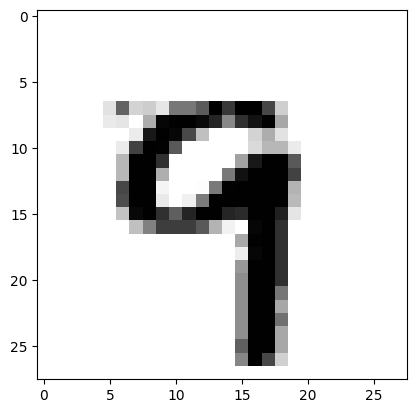

In [36]:
## Visualising the data using imshow fuction
# Use Numpy reshape function alongside

plt.imshow(X[0].reshape(28,28), cmap='gray_r')
plt.show()

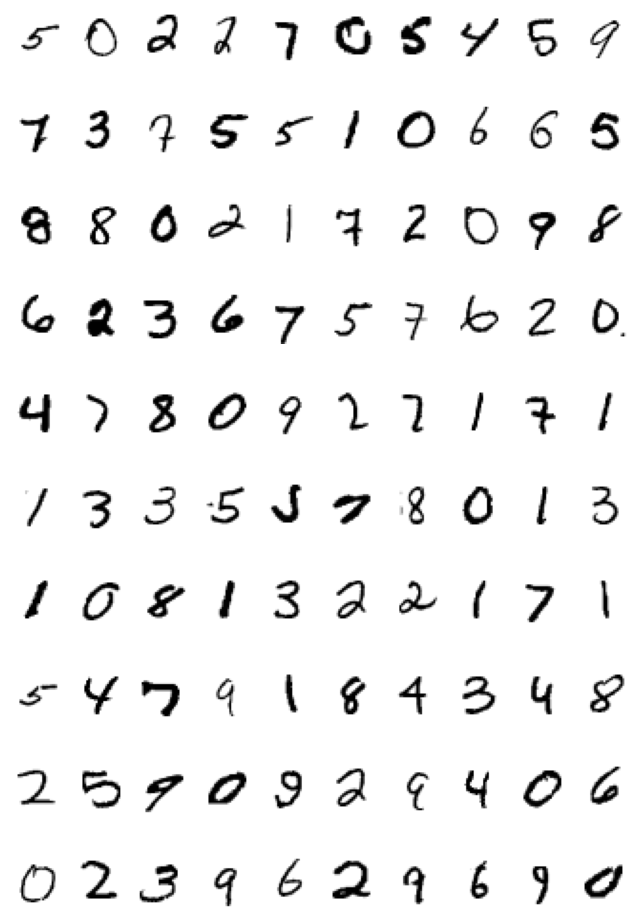

In [37]:
## Loop through the data to visualise multiple data (images) at once
##Numpy randint function is used as well

plt.figure(figsize=(8, 12))

for i in range(100):
  plt.subplot(10,10,i+1)
  plt.imshow(X[np.random.randint(0,6000)].reshape(28,28),cmap='gray_r')
  plt.axis('off')
plt.show()

In [38]:
## Using the test_test_split function to split the data into training and test dataset

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

## VarianceThreshold to remove low or no variance features

The process involves using filter method to remove features that no variance and low variance (below a set threshold)

This method only looks at the values of the data unlike other methods that compute a test statistics

In [39]:
from sklearn.feature_selection import VarianceThreshold

variance_selector = VarianceThreshold(threshold=0)

X_train_fs = variance_selector.fit_transform(X_train)
X_test_fs = variance_selector.transform(X_test)

print(f"{X_train.shape[1]-X_train_fs.shape[1]} features have been removed, {X_train_fs.shape[1]} features remain")

118 features have been removed, 666 features remain


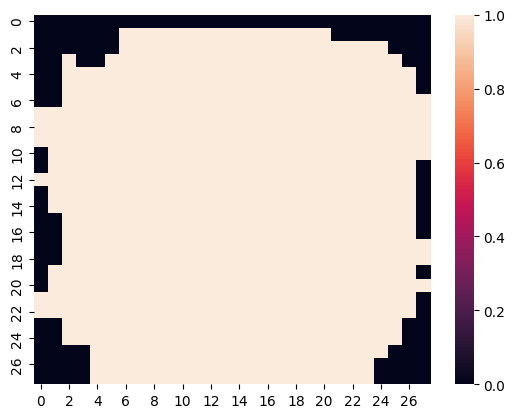

In [40]:
## Another to see the features that has been dropped. get_support function. It shows it as a visual

selected_features = variance_selector.get_support()

selected_features = selected_features.reshape(28, 28)

#Visualise which pixels have been dropped

sns.heatmap(selected_features, cmap='rocket')
plt.show()

## Filter Methods Using SelectKBest

For this method, you will need to select a test statisitic and a value of k, k meaning the number of features you want to retain

The step is simple
1. Instantiate the selector
2. Use fit_transform to both fit and transform the training dataset
3. Use transform to drop the features from the test set too


In [41]:
#Using SelectKBest selector from sklearn to select thek featurs with the best scores on a selected test statistics

from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(f_classif, k=200)

X_train_fs = selector.fit_transform(X_train_fs, y_train)
X_test_fs = selector.transform(X_test_fs)

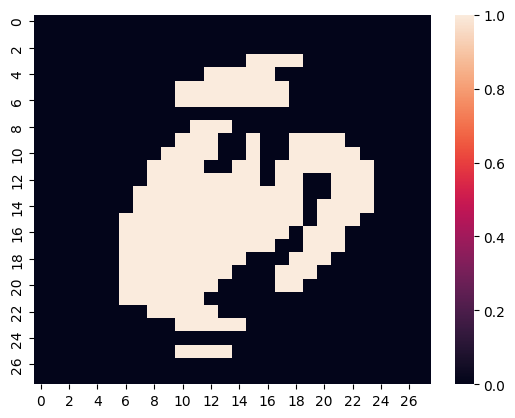

In [42]:
## Visualising and combining the features that have been removed from both the Variance Threshold selector and SelectKBest selector using get_support

new_features_indices = \
variance_selector.get_support(indices=True) [selector.get_support()]
new_features_boolean = np.isin(np.arange(784), new_features_indices)

#Reshape and plot heatmap

sns.heatmap(new_features_boolean.reshape(28,28), cmap='rocket')

plt.show()

## Recursive Feature Elimination using RFECV (Wrapper Method)

It uses a machine learning algorithm trained on dataset to help select features

RFE (Recursive Feature Elimination): When using this, you have to select the number of features you wish to retain

RFECV: provides an implementation of RFE with Cross Validation

In [44]:
#Applying RFECV (Wrapper Method)
#Improt all neccessary libraries

from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.feature_selection import RFECV

In [45]:
#Standardise data before passing to model

scaler = StandardScaler()
X_train_fs = scaler.fit_transform(X_train_fs)
X_test_fs = scaler.transform(X_test_fs)

In [46]:
rf = RandomForestClassifier(random_state=0) # Use RandomForestClassifier as the base model

rfecv = RFECV(rf, cv=3, step=5)
X_train_fs = rfecv.fit_transform(X_train_fs, y_train)
X_test_fs = rfecv.transform(X_test_fs)

print(f"Number of remaining features: {X_train_fs.shape[1]}")

Number of remaining features: 195


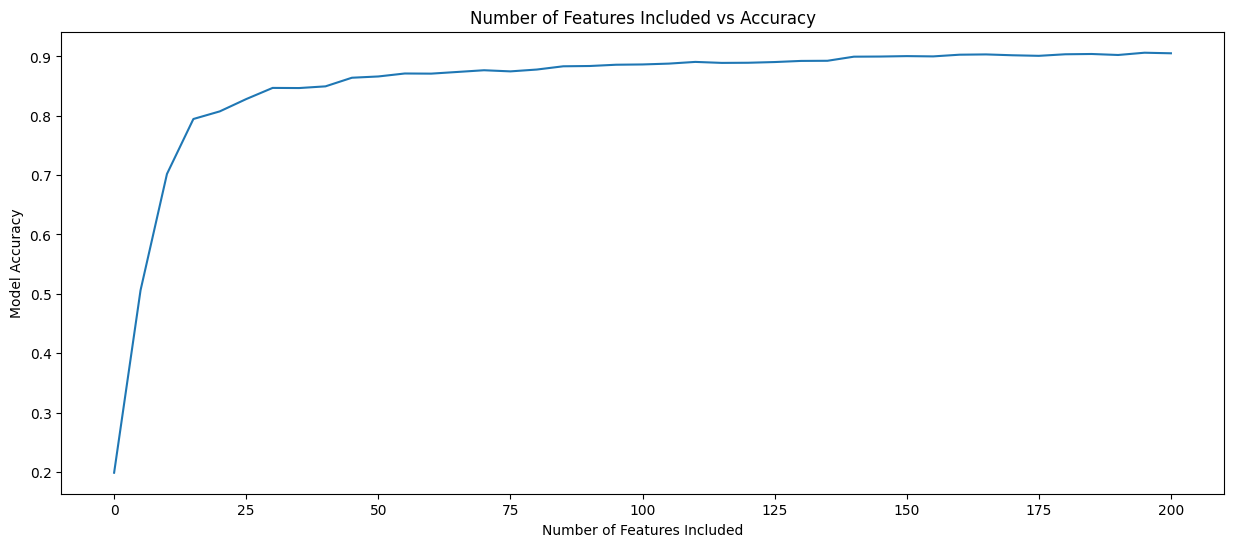

In [47]:
## Visualise

plt.figure( figsize=(15, 6))
plt.title('Number of Features Included vs Accuracy')
plt.xlabel('Number of Features Included')
plt.ylabel('Model Accuracy')
plt.plot(np.linspace(0,200,41), rfecv.cv_results_['mean_test_score'])
plt.show()

This should give you a plot like the one below. You can see that the accuracy reaches 80% with less than 25 features – so that means that only 25 pixels from the image (3% of the available features) are required to accurately predict the digit more than 80% of the time! After that, adding additional features only leads to more incremental improvements – for example, to reach 90% model accuracy we need around 150 features.

## Training and Evaluating a Model

In [48]:
rf_selectedfeatures = RandomForestClassifier()

rf_selectedfeatures.fit(X_train_fs, y_train)

RandomForestClassifier()

Accuracy Score: 92.22%


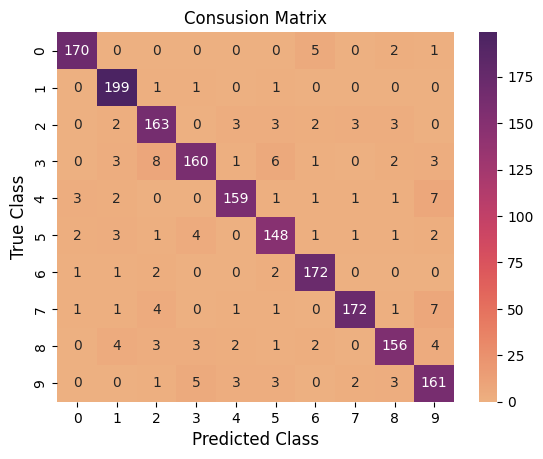

In [49]:
# Make predictions on the test data

y_pred = rf_selectedfeatures.predict(X_test_fs)

print(f"Accuracy Score: {accuracy_score (y_test, y_pred)* 100:.2f}%")

cm = confusion_matrix (y_test, y_pred)

ax = sns.heatmap(cm, cmap='flare', annot=True, fmt='d')

plt.xlabel("Predicted Class", fontsize=12)
plt.ylabel("True Class", fontsize=12)
plt.title("Consusion Matrix", fontsize=12)
plt.show()

## Addressing Class Imbalance

We can address class imbalance using resampling

Oversampling: Takes minority class and randomly duplicates occurence to match

Undersampling: Takes most commonly occuring target and randomly removes occurence to match

Oversampling/Undersampling is done on training dataset only

In [50]:
pip install -U imbalanced-learn

In [51]:
#Import neccessary Library

import numpy as np
import pandas as pd
import imblearn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [56]:
cardio_data = pd.read_csv("/content/drive/MyDrive/Datasets/Cardiotocographic.csv")

In [57]:
cardio_data.head()

,BPM,APC,FMPS,UCPS,DLPS,SDPS,PDPS,ASTV,MSTV,ALTV,MLTV,Width,Min,Max,NSP
0,120,0.000000,0.0,0.000000,0.000000,0.0,0.0,73,0.5,43,2.4,64,62,126,2
1,132,0.006380,0.0,0.006380,0.003190,0.0,0.0,17,2.1,0,10.4,130,68,198,1
2,133,0.003322,0.0,0.008306,0.003322,0.0,0.0,16,2.1,0,13.4,130,68,198,1
3,134,0.002561,0.0,0.007682,0.002561,0.0,0.0,16,2.4,0,23.0,117,53,170,1
4,132,0.006515,0.0,0.008143,0.000000,0.0,0.0,16,2.4,0,19.9,117,53,170,1


In [60]:
cardio_data.describe(include="all")

,BPM,APC,FMPS,UCPS,DLPS,SDPS,PDPS,ASTV,MSTV,ALTV,MLTV,Width,Min,Max,NSP
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003170,0.009474,0.004357,0.001885,0.000004,0.000157,46.990122,1.332785,9.84666,8.187629,70.445908,93.579492,164.025400,1.304327
std,9.840844,0.003860,0.046670,0.002940,0.002962,0.000063,0.000580,17.192814,0.883241,18.39688,5.628247,38.955693,29.560212,17.944183,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,0.000000,3.000000,50.000000,122.000000,1.000000
25%,126.000000,0.000000,0.000000,0.001876,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,4.600000,37.000000,67.000000,152.000000,1.000000
50%,133.000000,0.001630,0.000000,0.004482,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,7.400000,67.500000,93.000000,162.000000,1.000000
75%,140.000000,0.005631,0.002512,0.006525,0.003264,0.000000,0.000000,61.000000,1.700000,11.00000,10.800000,100.000000,120.000000,174.000000,1.000000
max,160.000000,0.019284,0.480634,0.014925,0.015385,0.001353,0.005348,87.000000,7.000000,91.00000,50.700000,180.000000,159.000000,238.000000,3.000000


In [61]:
cardio_data['NSP'].value_counts()

,count
NSP,
1,1655
2,295
3,176


An imbalance class. 77% of the observations belong to the Normal class

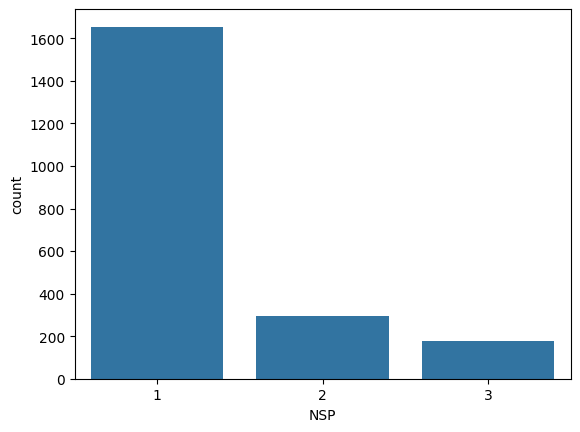

In [62]:
##Visualise

sns.countplot(cardio_data, x="NSP")
plt.show()

In [63]:
## Train test split the data

from sklearn.model_selection import train_test_split

X = cardio_data.drop('NSP', axis=1)
y = cardio_data['NSP'] -1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=y, random_state=0)

We also deduct 1 from the values of the classlabelsin the NSP column. This is because Keras assumes our class labels start at 0, whereas for this dataset the class labels are 1, 2 and 3. Once we have deducted 1, class 0 is Normal, class 1 is Suspect, and class 2 is Pathologic.


Using RandomOverSampler to carry out oversampling

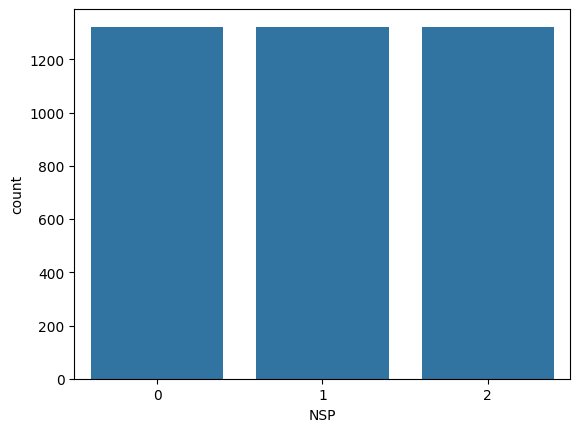

In [64]:
from imblearn.over_sampling import RandomOverSampler

resampler = RandomOverSampler(random_state=0)

X_train_oversampled, y_train_oversampled=resampler.fit_resample(X_train, y_train)

sns.countplot(x=y_train_oversampled)

plt.show()

Using RandomUnderSampler to carry out undersampling. we follow same process excelp in this case we will undersample only 0 and 1

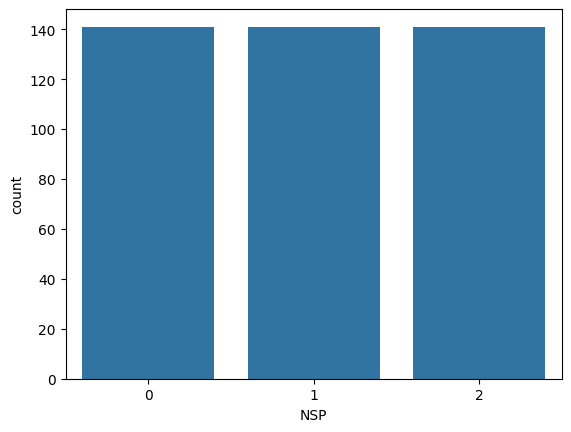

In [65]:
from imblearn.under_sampling import RandomUnderSampler

resampler=RandomUnderSampler(random_state=0)
X_train_undersampled, y_train_undersampled=resampler.fit_resample(X_train, y_train)
sns.countplot(x=y_train_undersampled)
plt.show()

We can also apply SMOTE as an alternative to random over sampling

<Axes: xlabel='NSP', ylabel='count'>

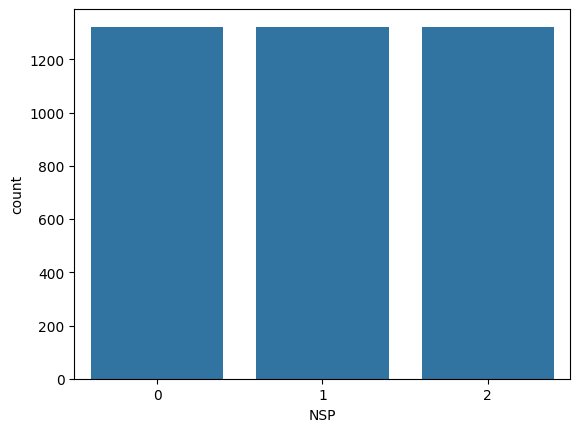

In [66]:
from imblearn.over_sampling import SMOTE

resampler = SMOTE(random_state=0)

X_train_smote, y_train_smote = resampler.fit_resample(X_train, y_train)

sns.countplot(x=y_train_smote)